![caption](files/exercise2_1.png)

$$p(x|Z) = \frac{p(Z|x)p(x)}{p(Z)}$$
We consider only a single measurement: $Z={z}$.  
$$p_{z|x}(z|x) = p_{w}(z-x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2\sigma^2}(z-x)^2}$$

$$p_{z}(z)=\int_{-\infty}^{\infty}p_{z|x}(z|x)p_{x}(x)dx=\frac{1}{\sigma\sqrt{2\pi}}\sum_{i=1}^{2}p_i\int_{-\infty}^{\infty}\delta(x-i)e^{-\frac{1}{2\sigma^2}(z-x)^2}dx=\frac{1}{\sigma\sqrt{2\pi}}\sum_{i=1}^{2}p_ie^{-\frac{1}{2\sigma^2}(z-i)^2}$$


$$p(x|Z)=\frac{e^{-\frac{1}{2\sigma^2}(z-x)^2}\sum_{i=1}^{2}p_i\delta(x-i)}{\sum_{i=1}^{2}p_ie^{-\frac{1}{2\sigma^2}(z-i)^2}}$$

#### 2. MAP estimate and associated MSE conditioned on $z$

$$\hat{x}^{MAP}(z)=argmax(e^{-\frac{1}{2}(z-x)^2}\sum_{i=1}^{2}p_i\delta(x-i))$$
If $e^{-\frac{1}{2}(z-1)^2}p_1 > e^{-\frac{1}{2}(z-2)^2}p_2$ then $$\hat{x}^{MAP} = 1$$
else $$\hat{x}^{MAP} = 2$$

$$MSE[\hat{x}^{MAP}(z)|Z]=E[[\hat{x}^{MAP}(z)-x]^2|Z]=\frac{1}{c}\int_{-\infty}^{+\infty}[\hat{x}^{MAP}(z)-x]^2e^{-\frac{1}{2\sigma^2}(z-x)^2}\sum_{i=1}^{2}p_i\delta(x-i)dx=\frac{1}{c}\sum_{i=1}^{2}p_i[\hat{x}^{MAP}(z)-i]^2e^{-\frac{1}{2\sigma^2}(z-i)^2}$$

In [21]:
p1 <- 0.3
zth <- function(p1,sigma) {
    return (1.5 - sigma^2 * (log(1-p1) - log(p1)))
}

# Sequence goes in
# Sequence goes out
mse <- function(sz, p1, sigma) {
    stmp1 <- p1 * exp(-0.5 * (sz-1)^2/sigma^2)
    stmp2 <- (1 - p1) * exp(-0.5 * (sz - 2)^2/sigma^2)
    sc <- stmp1 + stmp2
    sxmap <- ifelse(sz < zth(p1,sigma), rep(1,times=length(sz)), rep(2,times=length(sz)))   
    stmp3 <- (sxmap-1)^2
    stmp4 <- (sxmap-2)^2
    return ((stmp1*stmp3+stmp2*stmp4)/sc)
}

sz = seq(-5,3,0.1)
v = mse(sz, p1, 1)

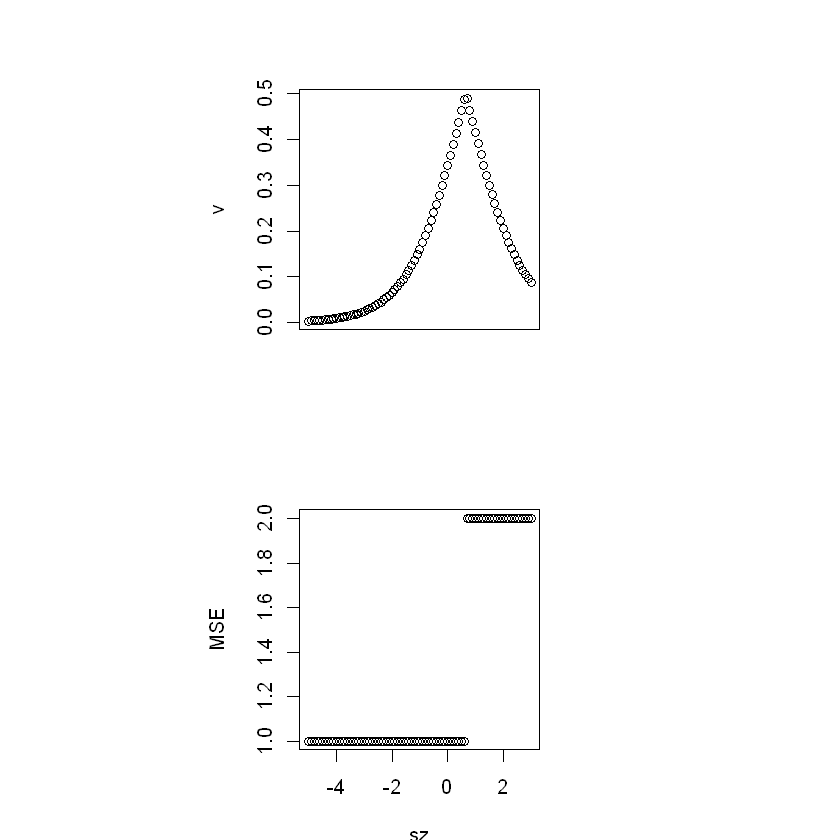

In [22]:
par(mfrow=c(2, 1))
par(mar=c(0, 0, 0, 0))
par(pin=c(2,2))
par(oma=c(0,0,0,0))
plot(sz,v, mfg=c(1,1), xaxt="n", xlab = "")
plot(sz,
     ifelse(sz < zth(p1,1), rep(1,times=length(sz)), rep(2,times=length(sz))), 
     mfg=c(2,1),
     ylab="MAP estimate")

#### 3. MMSE estimate and associated variance  

$$\hat{x}^{MMSE}(z)=E[x|z]=\int_{-\infty}^{\infty}xp(x|z)dx = \frac{1}{c}\int_{-\infty}^{\infty}xe^{-\frac{1}{2\sigma^2}(z-x)^2}\sum_{i=1}^{2}p_i\delta(x-i)dx=\frac{1}{c}\sum_{i=1}^{2}ip_ie^{-\frac{1}{2\sigma^2}(z-i)^2}$$

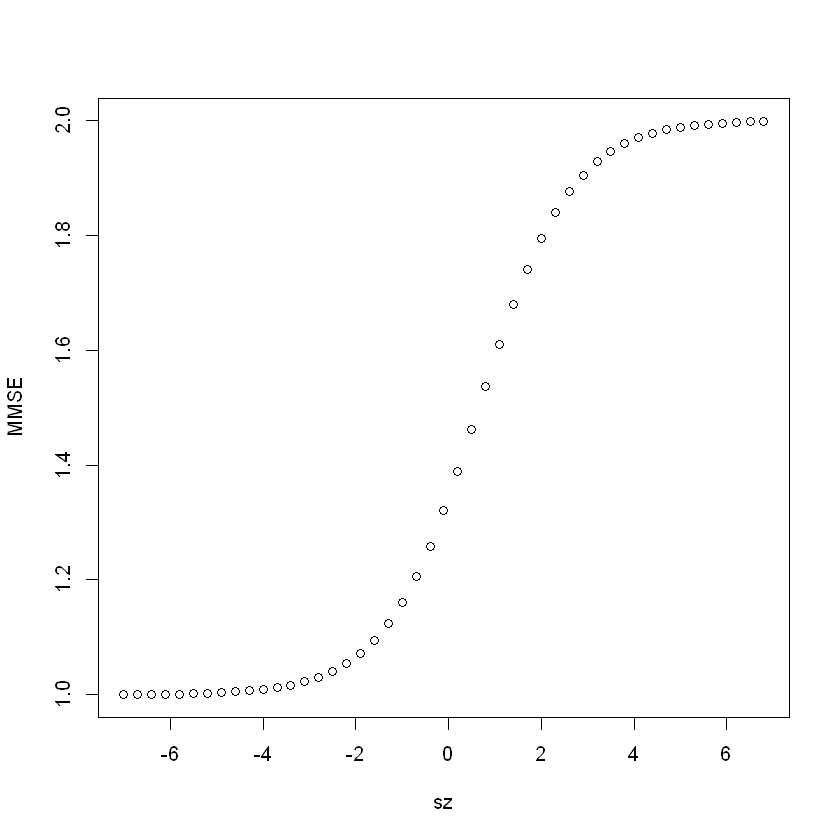

In [13]:
mmse = function(sz,p1,sigma){
    stmp1 <- p1 * exp(-0.5 * (sz-1)^2/sigma^2)
    stmp2 <- (1 - p1) * exp(-0.5 * (sz - 2)^2/sigma^2)
    sc <- stmp1 + stmp2
    return ((stmp1 + 2 * stmp2)/sc)
}
sz = seq(-7,7,0.3)
plot(sz,
     mmse(sz,p1,1), 
     ylab="MMSE")

> Note: Mean and mode of Gaussian pdf coincide. For that reason MAP and MMSE for Gaussian pdf coincide. For this example psoterior pdf is not Gaussian. Notice still that MAP and MMSE estimators are very similar.    

$$var(x|z)=E[[x-\hat{x}^{MMSE}(z)]^2|z] = \int_{-\infty}^{\infty}[x-\frac{1}{c}\sum_{i=1}^{2}ip_ie^{-\frac{1}{2\sigma^2}(z-i)^2}]^2\frac{e^{-\frac{1}{2\sigma^2}(z-x)^2}\sum_{i=1}^{2}p_i\delta(x-i)}{c}dx = \frac{\sum_{i=1}^{2}[p_ie^{-\frac{1}{2\sigma^2}(z-i)^2}[i-\frac{1}{c}\sum_{i=1}^{2}ip_ie^{-\frac{1}{2\sigma^2}(z-i)^2}]^2]}{c} $$  

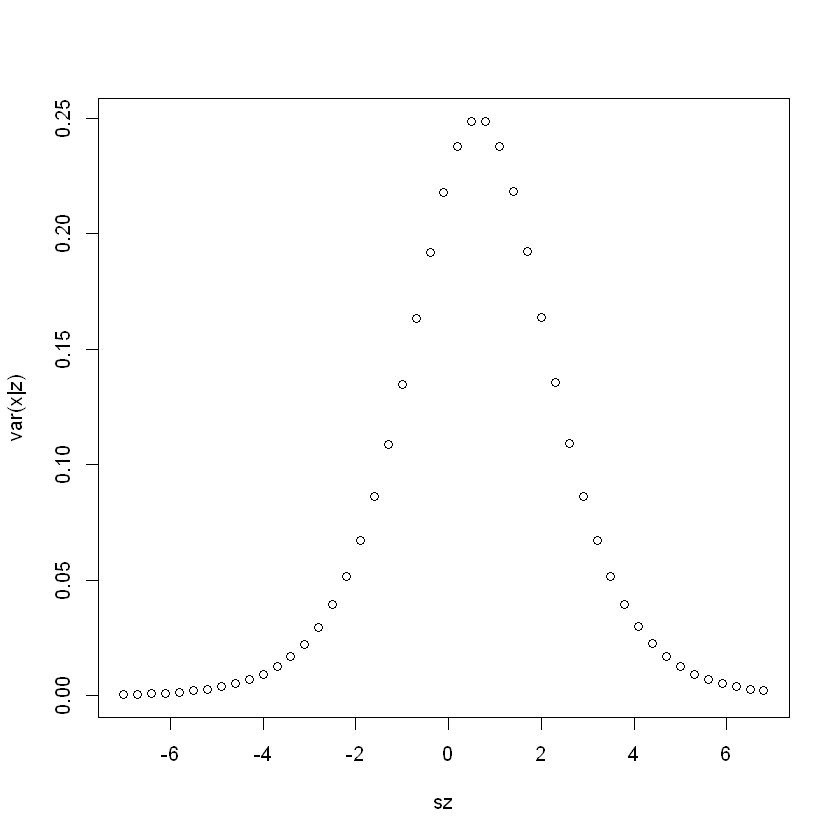

In [25]:
cond_mse_mmse = function(sz,p1,sigma) {
    stmp1 <- p1 * exp(-0.5 * (sz-1)^2/sigma^2)
    stmp2 <- (1 - p1) * exp(-0.5 * (sz - 2)^2/sigma^2)
    sc <- stmp1 + stmp2
    stmp3 = mmse(sz,p1,sigma)
    return ( ((stmp1 * (1-stmp3)^2) + (stmp2 * (2-stmp3)^2))/sc )
}
sz = seq(-7,7,0.3)
plot(sz,
     cond_mse_mmse(sz,p1,1), 
     ylab="var(x|z)")

#### 4 Evaluation of estimates